## Support vector machine:
Classification : to classify whether the voice is male or female with some given features

Support Vector Machine (SVM) is an Algorithm that is used to classify the elements that provides hyperplane betwee the classes .It can be useful in the regression problem too.,but mostly used in classification only.    
Three kinds of SVM ,      
1. Linear Kernel    
2. Polynomial Kernel (non-linear)    
3. rbf Kernel (complex)    

In the given dataset , I am going to check which one gives the best accuracy (which is the best model for the voice classification).    
main parameters are C_value(regularization Parameter) and gamma value.   

#### Step 1:
Importing libraries to play with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 2:
Loading dataset

In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


class label - male and female

In [4]:
#checking which feature contains string values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
#Checking whether feature value has a missing data
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

features has no missing values

#### Step 3:
splitting dataset to features and Target value

In [6]:
#input features
X = data.iloc[:,:-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [7]:
#target value (contains male,female)
y = data.iloc[:,-1]

#### Step 3:
Encoding the label 

In [8]:
#changing the label from string to integer value ( male = 1,female = 0)
#def str_column_to_int(data,column):
#    df = data
#    counts = df[column].value_counts()
#    df[column] = [counts.index.tolist().index(i) for i in df[column]]
#    return df[column]

#instead of doing it in fuction we use Labelencoder
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
#str_column_to_int(data,'label')

#### Step 4:
Data Standardization :    
                      Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.    
they might behave badly if the individual features do not more or less look like standard normally distributed data.   
standardizing feature values btw -1 and 1       
For instance many elements used in the objective function of
    a learning algorithm (such as the RBF kernel of Support Vector
    Machines or the L1 and L2 regularizers of linear models) assume that
    all features are centered around 0 and have variance in the same
    order.

In [10]:
#standardized Feature values  z = (X-mean)/SD
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [11]:
#20 features
X.shape

(3168, 20)

In [12]:
#target value
y.shape

(3168,)

#### Step 5:
Splitting dataset into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#### Step 5:
fitting a dataset into the linear,rbf,polynomialSVM model with default hyperparameters

In [14]:
#Support Vector Machine (default)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model_default = SVC().fit(X_train,y_train)
svm_model_default
#predicting the model with testing data
y_pred = svm_model_default.predict(X_test)
#Checking accuracy
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy for default model: ',accuracy)

The accuracy for default model:  0.9826498422712934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
#Linear model
svm_model_linear = SVC(kernel = 'linear').fit(X_train,y_train)
#predicting the model with test data
y_pred = svm_model_linear.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for linear SVC: ',accuracy)

Accuracy for linear SVC:  0.9794952681388013


In [16]:
#polynomial model
svm_model_poly = SVC(kernel = 'poly').fit(X_train,y_train)
#predicting the model with test data
y_pred = svm_model_poly.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for polynomial SVC: ',accuracy)

Accuracy for polynomial SVC:  0.9605678233438486


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Step 6:
Using Cross validation (k-fold) o different kernel to get a accuracy score for each splitting

In [17]:
#for rbf SVC model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model_default,X,y,cv=10,scoring='accuracy')
print(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.93396226 0.95597484 0.96855346 0.9591195  0.96835443 0.99683544
 0.98734177 0.98101266 0.91455696 0.99367089]


In [18]:
#In K-fold cross validation we generally take the mean of all the scores.
print('rbf SVC: ',scores.mean())

rbf SVC:  0.9659382214791815


In [19]:
#for linear model
scores = cross_val_score(svm_model_linear,X,y,cv = 10,scoring = 'accuracy')
scores

array([0.91194969, 0.97169811, 0.97169811, 0.97169811, 0.96202532,
       0.98734177, 0.99050633, 0.98101266, 0.95253165, 0.99367089])

In [20]:
print('for linear SVC : ',scores.mean())

for linear SVC :  0.9694132632752168


In [21]:
#for polynomial model
#for linear model
scores = cross_val_score(svm_model_poly,X,y,cv = 10,scoring = 'accuracy')
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([0.89937107, 0.94654088, 0.93081761, 0.91509434, 0.95886076,
       1.        , 0.98101266, 0.96835443, 0.87974684, 0.9778481 ])

In [22]:
print('for poly SVC: ',scores.mean())

for poly SVC:  0.9457646684181196


#### Step 7:
Finding best C value and gamma Value for the model

In [23]:
C_range = list(range(1,20))
accuracy_val = []
for c in C_range:
    svm = SVC(kernel = 'linear',C=c)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

[0.9694132632752168,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9690987978664118,
 0.9694132632752168,
 0.9690987978664118,
 0.9687843324576069,
 0.9684698670488018,
 0.9684698670488018,
 0.9684698670488018,
 0.9684698670488018,
 0.9681534113525991,
 0.9681534113525991,
 0.9681534113525991,
 0.9681534113525991,
 0.9678369556563966,
 0.9678369556563966,
 0.9678369556563966]

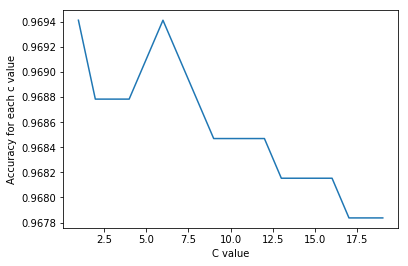

In [24]:
#plotting the value
plt.plot(C_range,accuracy_val)
plt.xlabel('C value')
plt.ylabel('Accuracy for each c value')
plt.show()

close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.

In [25]:
# C value from 0.1 to 6
C_range = list(np.arange(0.1,6,0.1))
accuracy_val = []
for c in C_range:
    svm = SVC(kernel = 'linear',C=c)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

[0.9700481649550194,
 0.9691007881538095,
 0.9690987978664118,
 0.9690987978664118,
 0.9694132632752168,
 0.9694132632752168,
 0.9697277286840219,
 0.9694112729878194,
 0.9690968075790144,
 0.9694132632752168,
 0.9694132632752168,
 0.9694132632752168,
 0.9694132632752168,
 0.9687823421702095,
 0.9690987978664118,
 0.9690987978664118,
 0.9690987978664118,
 0.9690987978664118,
 0.9687843324576069,
 0.9687843324576069,
 0.9690987978664118,
 0.9690987978664118,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9687843324576069,
 0.9690987978664118,
 0.9690987978

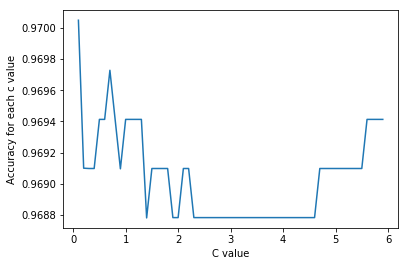

In [26]:
#plotting the value
plt.plot(C_range,accuracy_val)
plt.xlabel('C value')
plt.ylabel('Accuracy for each c value')
plt.show()

Accuracy score is highest for C=0.1

#### Gamma Value

In [27]:
#rbf model
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
accuracy_val = []
for g in gamma_range:
    svm = SVC(kernel = 'rbf',gamma = g)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

[0.8878114799777087,
 0.9552463975798107,
 0.9681514210652018,
 0.9630960910755512,
 0.9072366849773108,
 0.5955377756548046,
 0.5]

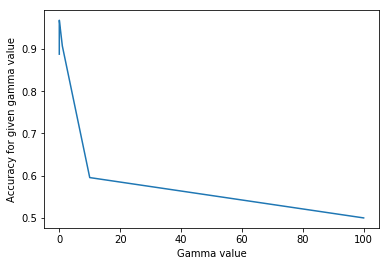

In [28]:
#plotting the value

plt.plot(gamma_range,accuracy_val)
plt.xlabel('Gamma value')
plt.ylabel('Accuracy for given gamma value')
plt.show()

increased accuracy in gamma = 0.01 and again decreasing

In [29]:
#### Degree for polynomial SVC
#rbf model
degree = [1,2,3,4,5,6]
accuracy_val = []
for d in degree:
    svm = SVC(kernel = 'poly',degree = d)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.9703626303638245,
 0.8506926200143299,
 0.9457646684181196,
 0.8312116869675981,
 0.8659820078019266,
 0.7747571849375049]

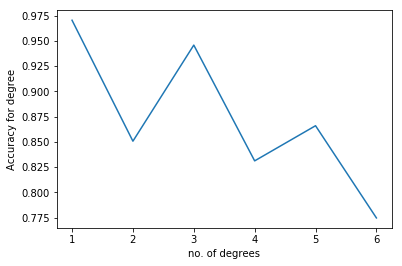

In [30]:
#plotting the value

plt.plot(degree,accuracy_val)
plt.xlabel('no. of degrees')
plt.ylabel('Accuracy for degree')
plt.show()

Score is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases.Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting.

## Here, in this model Linear kernel and rbf kernel gives the best accuracy compared to polynomial.

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[293,  21],
       [  4, 316]], dtype=int64)